In [2]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd
import scanpy.api as sc
import umap

In [3]:
SCP_metadata = pd.read_csv('/mnt/PROJECTS/Fetal_paper/fetal_sample_tracker_table1.txt', sep = '\t', index_col = 0)

In [52]:
SCP_metadata=SCP_metadata[11:22]

In [4]:
SCP_metadata

,# cells,donor_num,PCW,CRL,region,tar_cells,viability %,purification,Fraction,Unnamed: 10,Unnamed: 11,Unnamed: 12
Sanger Sample ID,,,,,,,,,,,,
4918STDY7321513,2036,1,F6.1,17,DU,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7321514,2294,1,F6.1,17,IL,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7321515,3218,1,F6.1,17,CO,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7317585,3093,2,F8.4,32,DU,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7317586,1969,2,F8.4,32,IL,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7317587,2655,2,F8.4,32,CO,2000,NaN,none,total,NaN,NaN,NaN
4918STDY7421297,1551,3,F10.2,49,DU,2000,NaN,MACS,pos,NaN,NaN,NaN
4918STDY7421298,2006,3,F10.2,49,IL,2000,NaN,MACS,pos,NaN,NaN,NaN
4918STDY7421299,799,3,F10.2,49,CO,2000,NaN,MACS,pos,NaN,NaN,NaN


In [5]:
path = '/mnt/Unprocessed_all/'
filenames = SCP_metadata.index

In [6]:
filenames 

Index(['4918STDY7321513', '4918STDY7321514', '4918STDY7321515',
       '4918STDY7317585', '4918STDY7317586', '4918STDY7317587',
       '4918STDY7421297', '4918STDY7421298', '4918STDY7421299',
       '4918STDY7426904', '4918STDY7426905', '4918STDY7426906',
       '4918STDY7426907', '4918STDY7426908', '4918STDY7426909',
       '4918STDY7693757', '4918STDY7693758', '4918STDY7693759',
       '4918STDY7693760', '4918STDY7693761', '4918STDY7693762',
       '4918STDY7693763', '4918STDY7717783', '4918STDY7717784',
       '4918STDY7717785', '4918STDY7717787', '4918STDY7717788',
       '4918STDY7717789', '4918STDY7718972', '4918STDY7718973',
       '4918STDY7718974', '4918STDY7718975', '4918STDY7718976',
       '4918STDY7718977'],
      dtype='object', name='Sanger Sample ID')

In [9]:
def applyScrubblet(sampleName, rootPath):
    # read in matrix
    E = scipy.io.mmread(rootPath + sampleName + '/cellranger/' + 'matrix.mtx').T.tocsc() 
    genes = np.array(scr.load_genes(rootPath + sampleName + '/cellranger/' + 'genes.tsv', delimiter='\t', column=1))
    barcodes = pd.read_csv(rootPath + sampleName + '/cellranger/' + 'barcodes.tsv', delimiter='\t', header=None)
    print('Counts matrix shape: {} rows, {} columns'.format(E.shape[0], E.shape[1]))
    print('Number of genes in gene list: {}'.format(len(genes)))
    
    # apply scrubblet
    total_counts = E.sum(1).A.squeeze()

    fig, ax = plt.subplots(figsize = (10, 5))
    ax.hist(total_counts, bins = np.logspace(3, 5, 40))
    ax.set_xscale('log')
    ax.set_xlabel('Total counts')
    ax.set_ylabel('Number of cells')
    
    plt.savefig("/mnt/PROJECTS/Fetal_paper/outputfiles/sample_" +sampleName+ ".png")
    
    #calculate doublet scores
    scrub = scr.Scrublet(E, expected_doublet_rate=0.06)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
    
    scrub.call_doublets(threshold=0.25)
    scrub.plot_histogram();

    print('Running UMAP...')
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
    print('Done.')

    #save the plots & calculations
    plt.savefig("/mnt/PROJECTS/Fetal_paper/outputfiles/UMAP_"+sampleName +".png")
        
    res = pd.DataFrame([barcodes.iloc[:,0], doublet_scores,predicted_doublets],
                      index=["barcode", "doublet_scores","predicted_doublets"]).T
    
    return res
    

Counts matrix shape: 2082 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 14.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.1%
Elapsed time: 3.3 seconds
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 36.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.3%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 2322 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 4.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.4%
Elapsed time: 3.1 seconds
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 24.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 3299 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 34.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.3%
Elapsed time: 5.8 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 46.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.2%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Done.
Counts matrix shape: 3209 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 2.3%
Estimated detectable doublet fraction = 44.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.1%
Elapsed time: 6.0 seconds
Detected doublet rate = 2.5%
Estimated detectable doublet fraction = 48.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.2%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 2033 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 28.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.2%
Elapsed time: 3.4 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 46.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.9%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 2701 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 6.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 4.0 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 31.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.9%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 1576 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.4%
Elapsed time: 2.4 seconds
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 11.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.5%
Running UMAP...
Done.
Counts matrix shape: 2047 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.0%
Elapsed time: 3.1 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 11.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 11.5%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 819 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 22.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.3%
Elapsed time: 0.9 seconds
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 27.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.5%
Running UMAP...
Done.
Counts matrix shape: 943 rows, 33694 columns
Number of genes in gene list: 33694
Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 28.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.8%
Elapsed time: 0.9 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 34.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.0%
Running UMAP...
Done.
Counts matrix shape: 1919 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 44.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.5%
Elapsed time: 1.9 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 47.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.4%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 2753 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 9.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.3%
Elapsed time: 2.9 seconds
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 21.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.6%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1090 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 29.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.3%
Elapsed time: 1.1 seconds
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 38.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.6%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 1747 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 29.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 1.9 seconds
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 47.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.6%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1180 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 12.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.3%
Elapsed time: 0.9 seconds
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 21.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.4%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1403 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 6.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.5%
Elapsed time: 1.9 seconds
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 22.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 9.9%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1597 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 5.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.8%
Elapsed time: 2.8 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 15.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.6%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1764 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 12.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.1%
Elapsed time: 2.5 seconds
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 30.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.4%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1420 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 16.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.9%
Elapsed time: 2.4 seconds
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 26.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.1%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 1232 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 26.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.8%
Elapsed time: 2.2 seconds
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 36.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.5%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1761 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 13.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.5%
Elapsed time: 2.2 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 29.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.8%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 3250 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 11.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.9%
Elapsed time: 3.7 seconds
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 36.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.1%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 1698 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 5.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
Elapsed time: 2.9 seconds
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 16.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.0%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 953 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 26.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.8%
Elapsed time: 1.4 seconds
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 34.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.8%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 1948 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 22.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 4.1 seconds
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 42.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.3%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 2065 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 10.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.9%
Elapsed time: 3.0 seconds
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 26.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.9%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 2292 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 14.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.9%
Elapsed time: 2.5 seconds
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 31.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.6%
Running UMAP...


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.
Counts matrix shape: 2348 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 39.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.7%
Elapsed time: 2.9 seconds
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 48.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.2%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 2187 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 17.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.1%
Elapsed time: 2.9 seconds
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 38.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.2%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 3429 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 20.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.2%
Elapsed time: 5.5 seconds
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 40.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.1%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 2658 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 12.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.9%
Elapsed time: 4.0 seconds
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 36.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.6%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Done.
Counts matrix shape: 1346 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 4.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.8%
Elapsed time: 2.3 seconds
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 12.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.5%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 1520 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 9.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.4%
Elapsed time: 3.1 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 25.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.5%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.
Counts matrix shape: 715 rows, 33694 columns
Number of genes in gene list: 33694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Preprocessing...


/usr/local/lib/python3.6/dist-packages/scrublet/helper_functions.py:238: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 15.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 4.5%
Elapsed time: 1.0 seconds
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 25.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.3%


/usr/local/lib/python3.6/dist-packages/scrublet/scrublet.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Running UMAP...
Done.


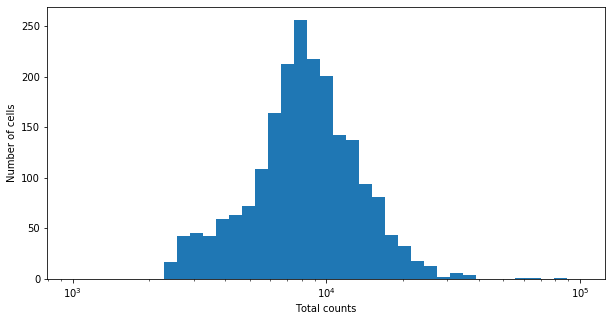

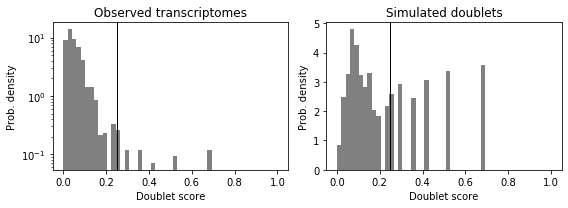

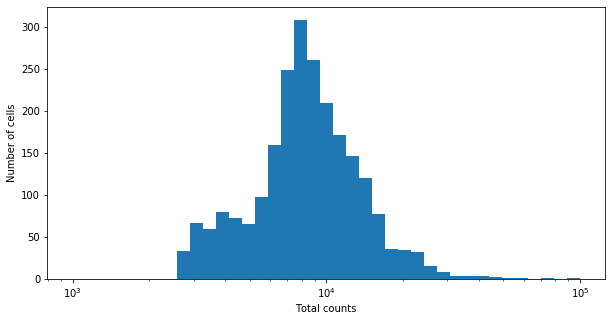

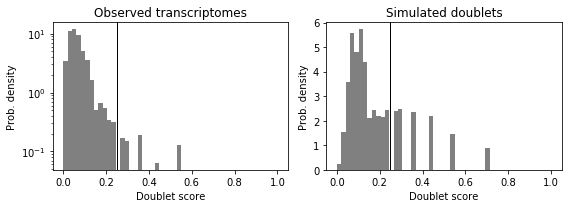

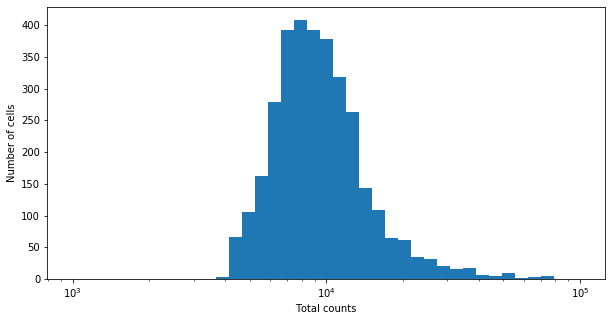

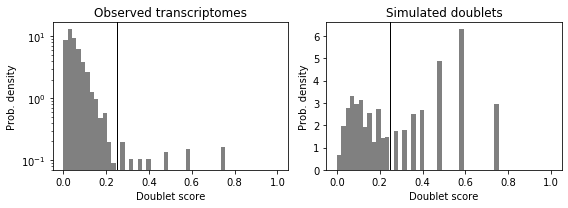

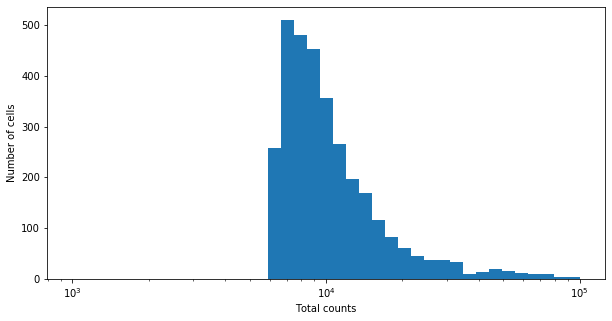

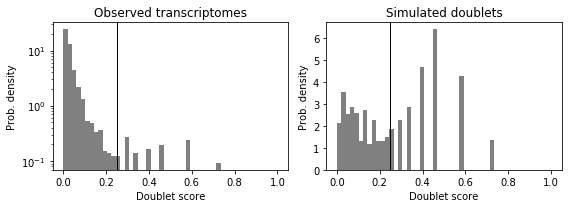

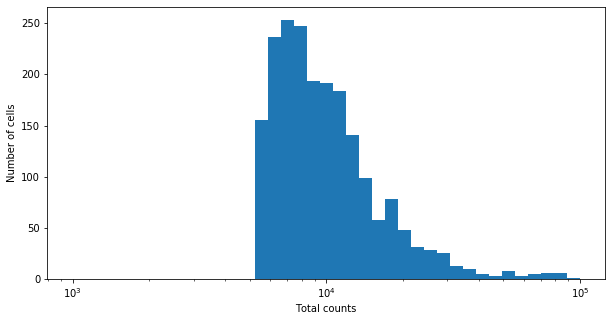

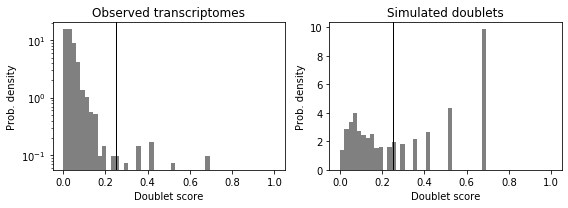

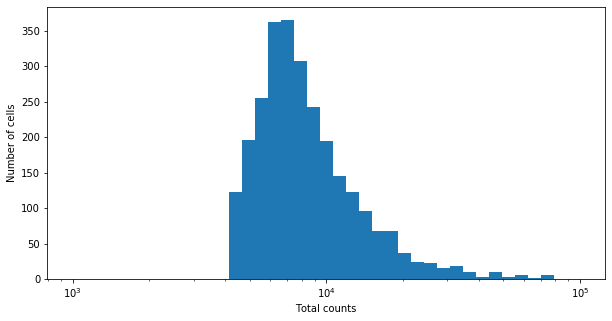

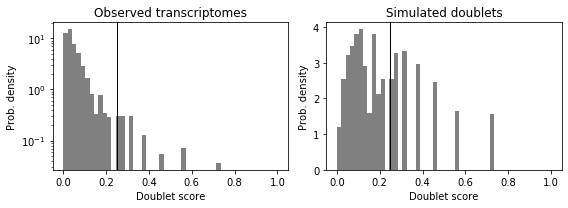

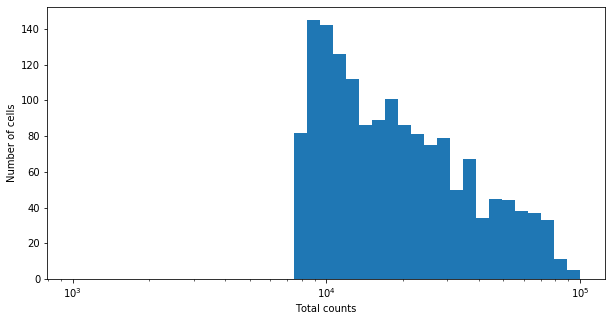

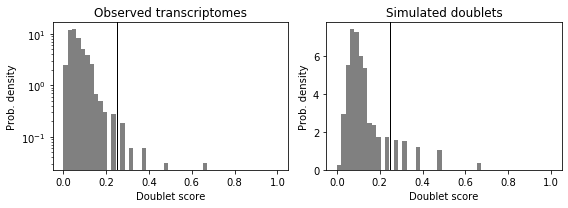

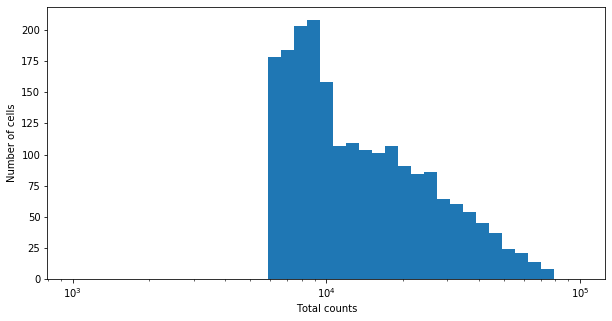

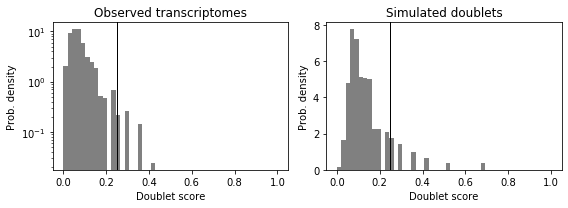

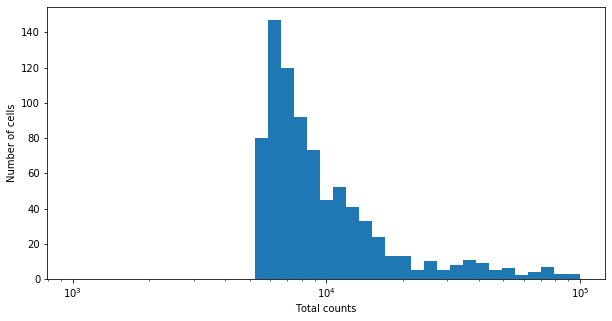

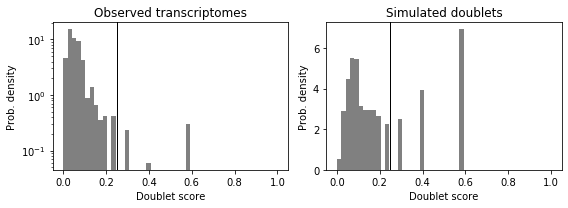

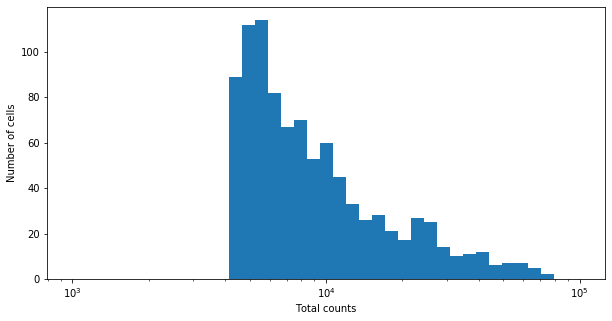

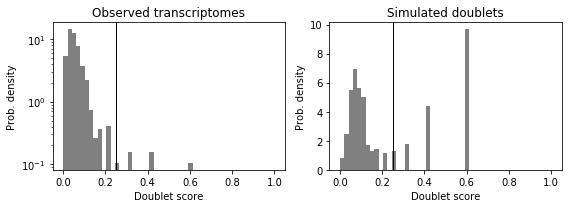

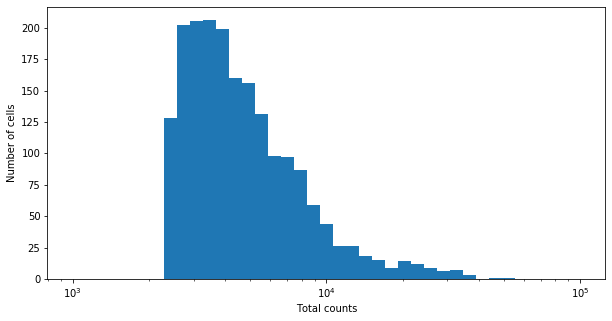

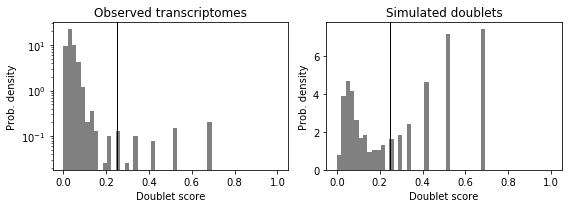

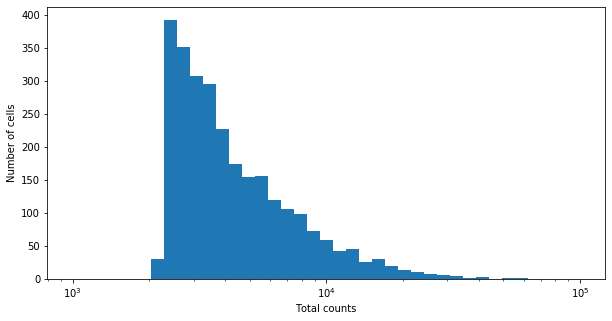

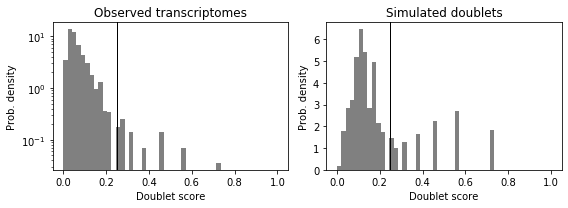

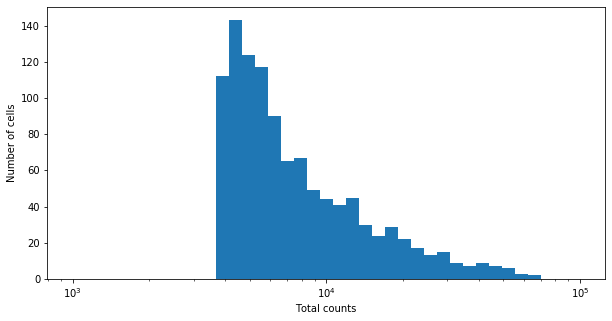

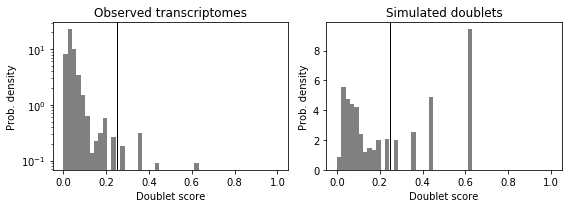

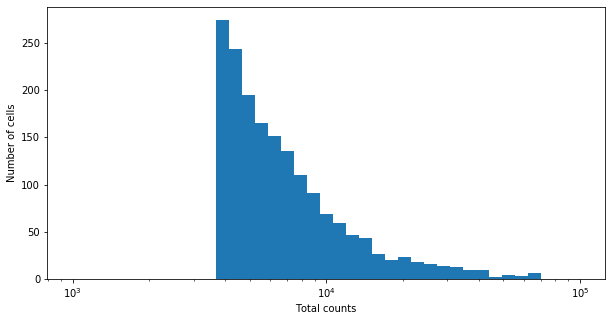

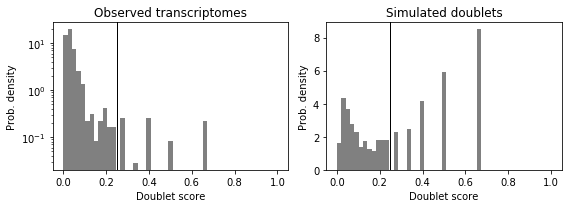

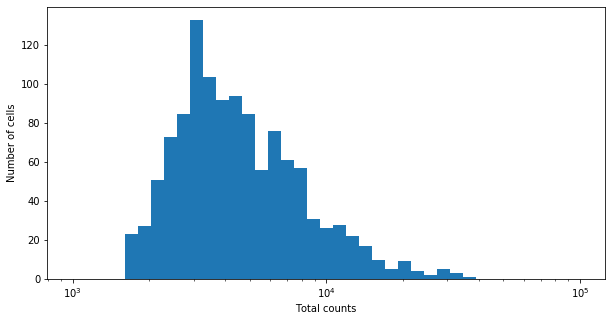

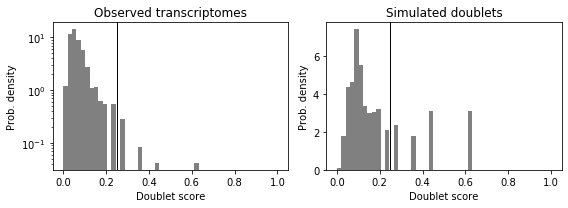

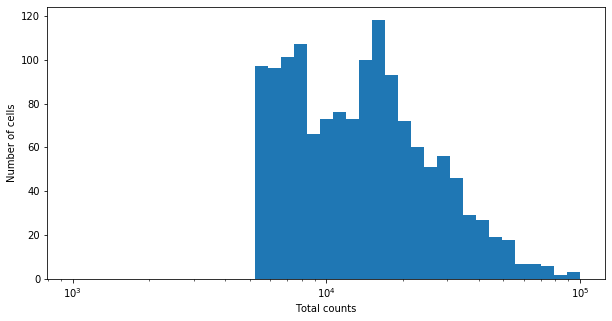

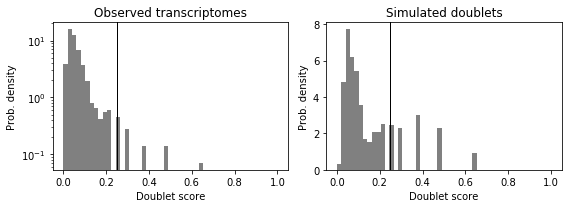

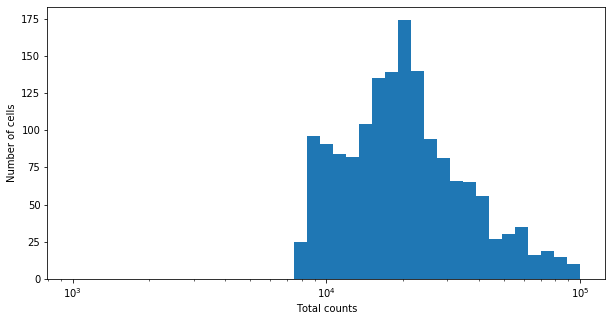

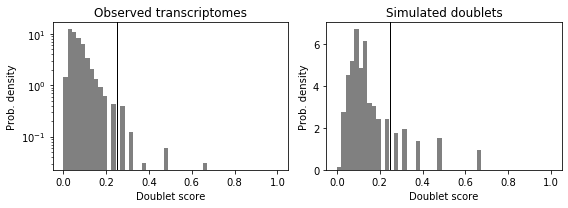

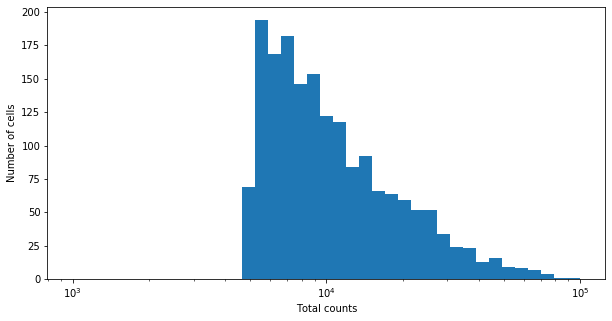

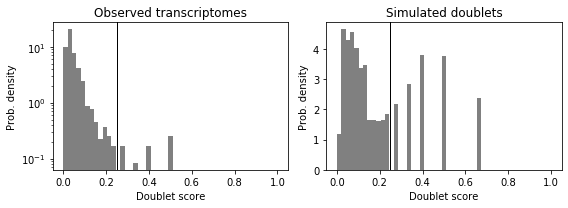

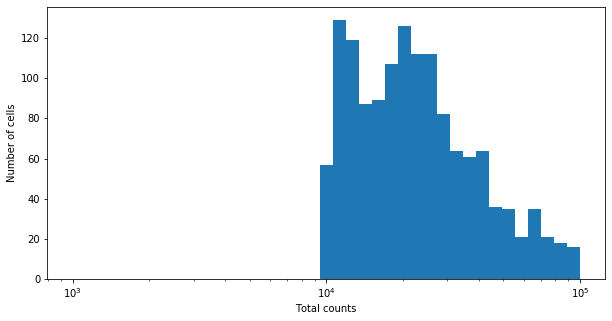

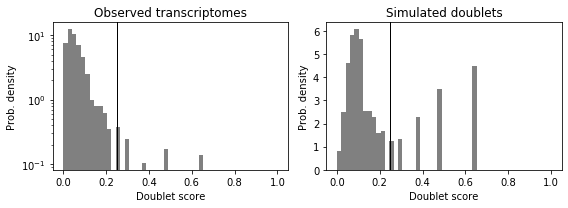

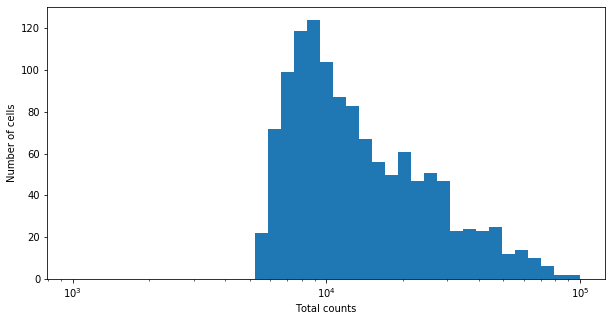

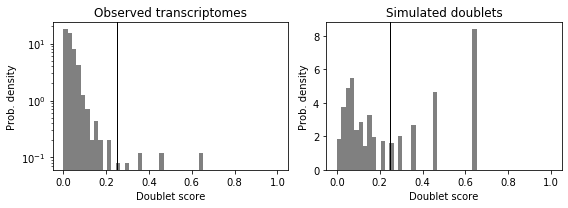

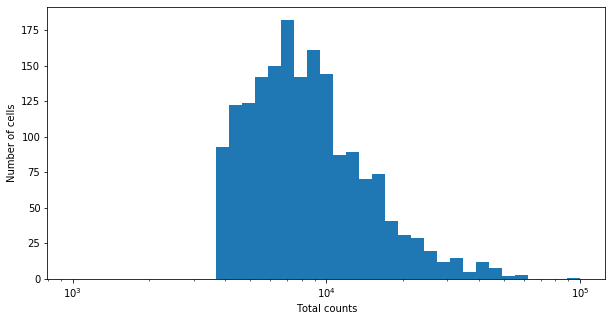

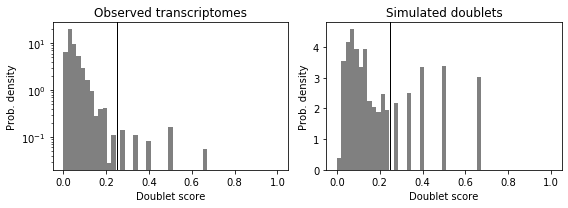

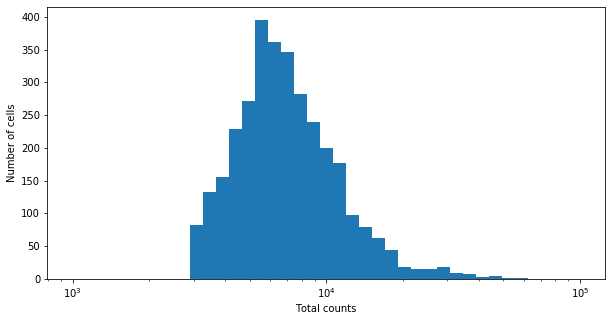

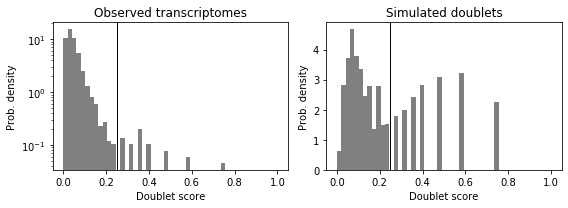

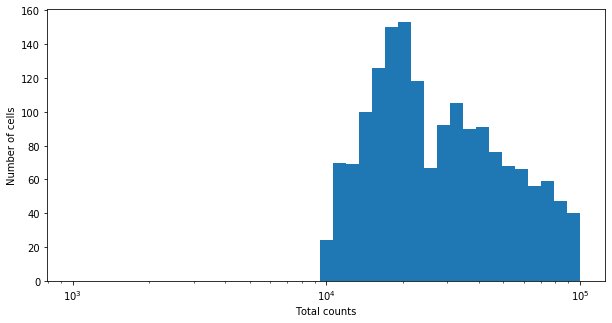

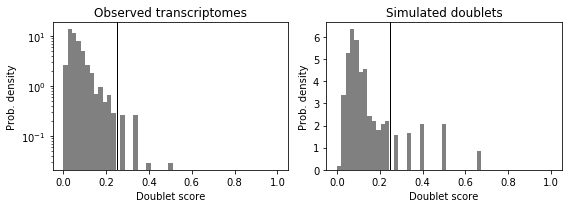

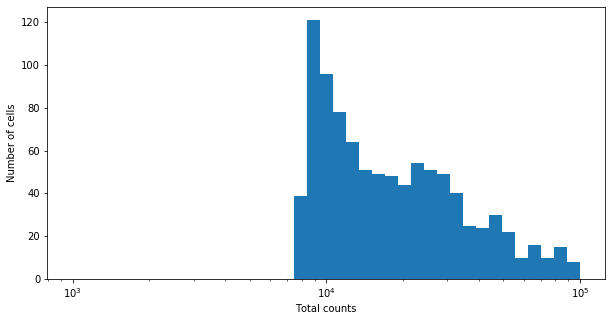

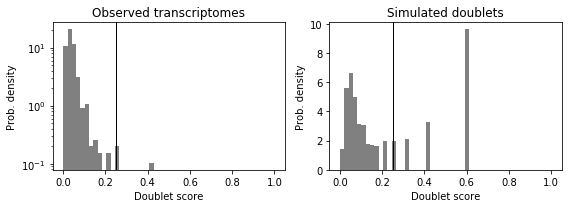

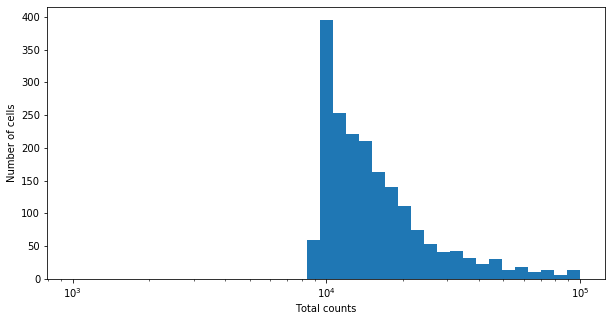

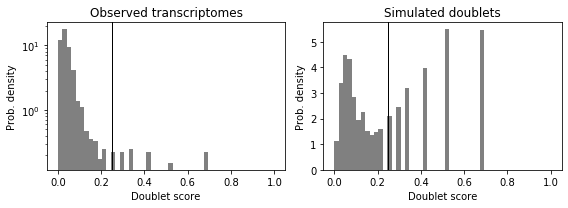

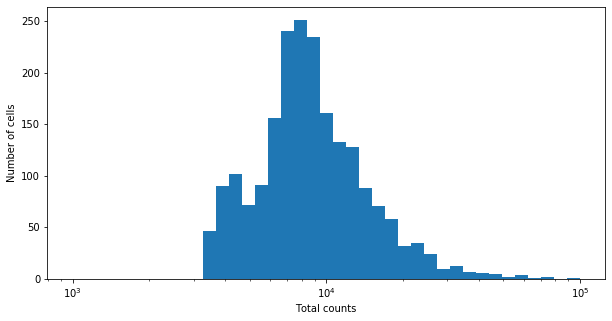

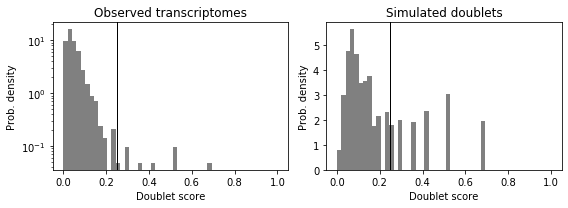

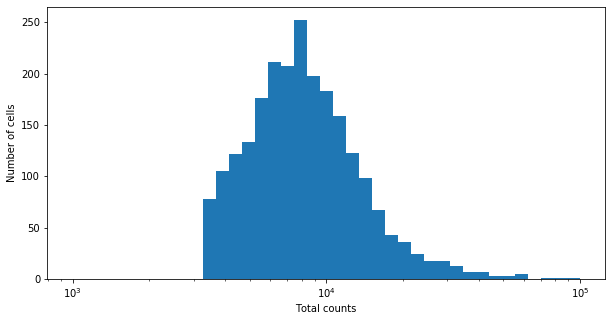

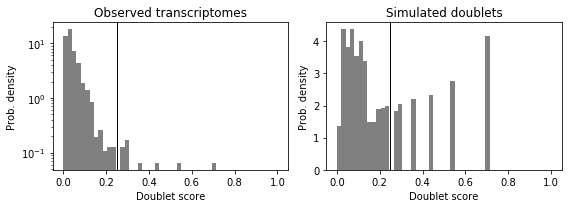

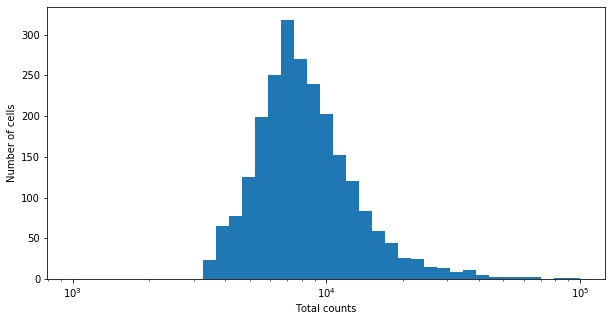

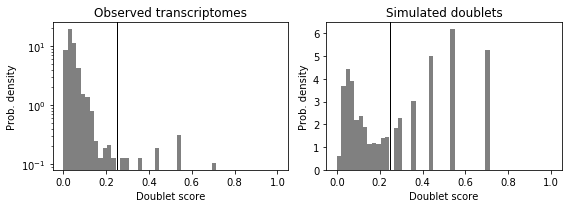

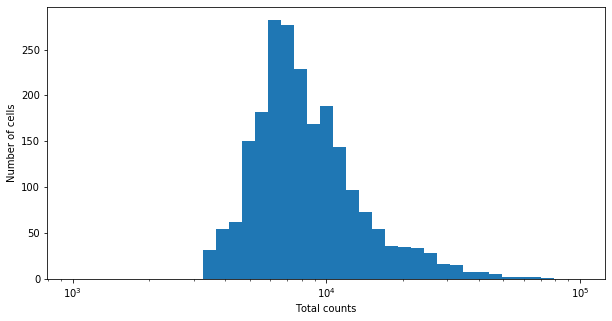

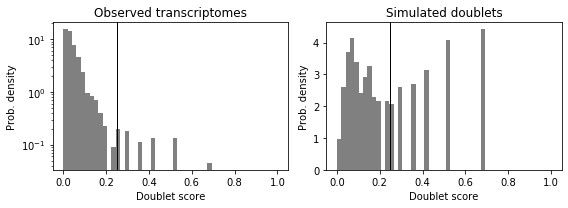

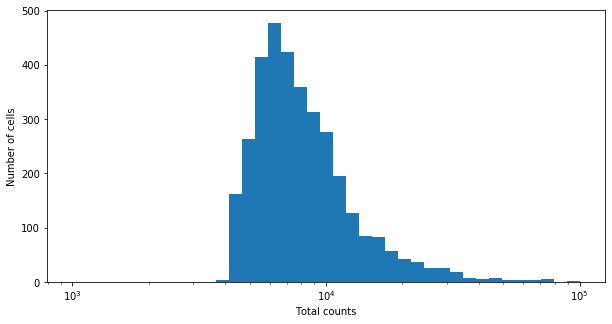

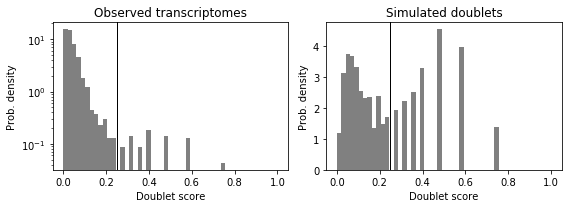

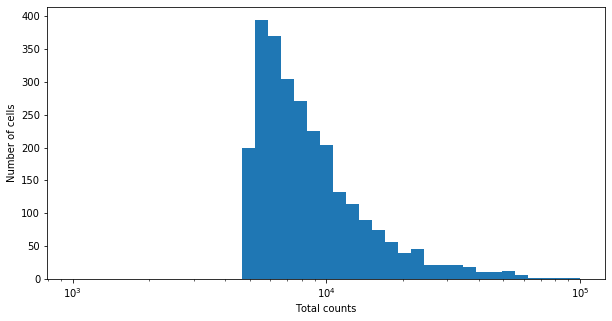

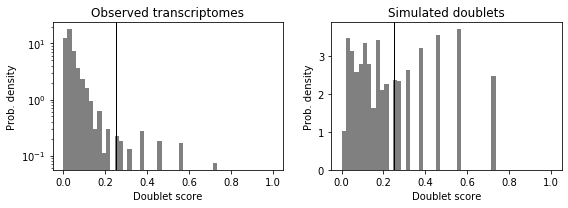

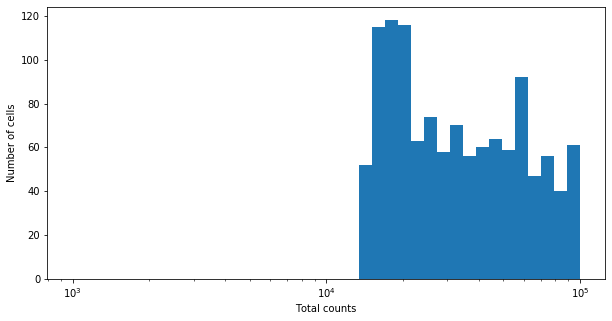

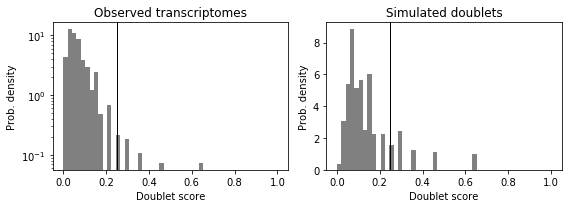

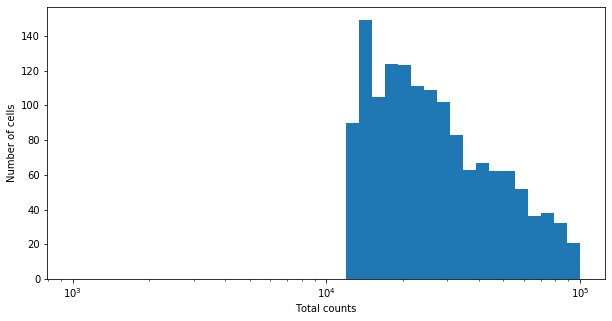

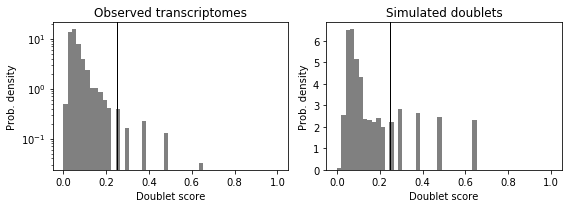

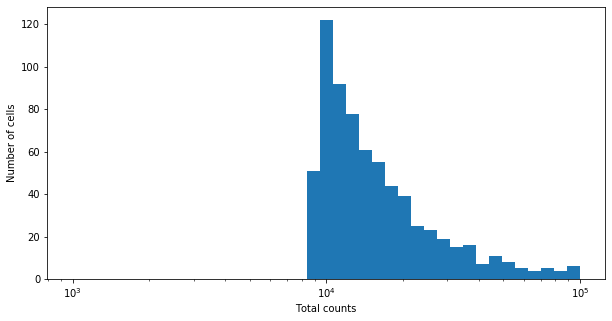

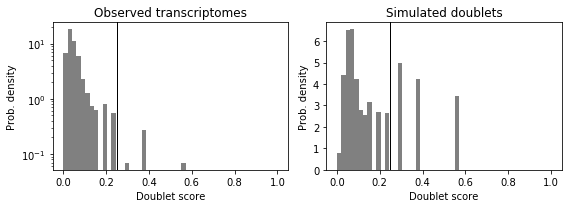

In [10]:
all_scrub_results=[applyScrubblet(file, path) for file in filenames]

In [11]:
range(len(all_scrub_results))

range(0, 34)

In [12]:
for i in range(len(all_scrub_results)): 
    all_scrub_results[i].barcode=all_scrub_results[i].barcode +"-" +filenames[i]
    all_scrub_results[i].to_csv("/mnt/PROJECTS/Fetal_paper/outputfiles/file_" + filenames[i] +".csv")
    
import pandas as pd
df = pd.concat(all_scrub_results)
df.to_csv("/mnt/PROJECTS/Fetal_paper/outputfiles/all_scores_together2.csv")

In [13]:
new=pd.read_csv("/mnt/PROJECTS/Fetal_paper/outputfiles/all_scores_together2.csv", index_col="Unnamed: 0")


In [14]:
new

,barcode,doublet_scores,predicted_doublets
0,AAACCTGAGCTGCAAG-1-4918STDY7321513,0.018106,False
1,AAACCTGCACTGAAGG-1-4918STDY7321513,0.022819,False
2,AAACCTGCATCCCACT-1-4918STDY7321513,0.052346,False
3,AAACGGGAGAGTACAT-1-4918STDY7321513,0.062446,False
4,AAACGGGAGAGTTGGC-1-4918STDY7321513,0.106464,False
...,...,...,...
710,TTTCCTCTCACAGGCC-1-4918STDY7718977,0.043114,False
711,TTTGCGCTCTCTGTCG-1-4918STDY7718977,0.022107,False
712,TTTGGTTCACTTGGAT-1-4918STDY7718977,0.227926,False
713,TTTGTCAAGAGCTGGT-1-4918STDY7718977,0.052419,False


# excellent. all_scores_together contain the cell barcodes and the doublet value. load it into the adata and check how the umap looks like 